# Библиотека `pandas`: часть 2

*Алла Тамбовцева*

## Домашнее задание 

### Описание домашнего задания и формат сдачи

В домашнем задании необходимо решить предложенные задачи по программированию – вписать свой код в ячейки после условий задач вместо комментария `### YOUR CODE HERE ###` в файле *homework-pandas2.ipynb* и сохранить изменения, используя опцию *Save and Checkpoint* из вкладки меню *File* или кнопку *Save and Checkpoint* на панели инструментов. Итоговый файл в формате `.ipynb` (файл Jupyter Notebook) необходимо загрузить в личный кабинет обучающей онлайн платформы Skillbox (https://go.skillbox.ru/) и отправить на проверку.

Файл `Fishing.csv` содержит результаты опроса о рыбалке: респонденты, заполняя опросник, подробно описывали свою недавнюю рыбалку.

**Описание переменных в датафрейме:**


* `mode`: выбранный тип рыбалки: на берегу (`beach`), на пирсе (`pier`), в своей лодке (`boat`) и в арендованной лодке (`charter`);

* `price`: стоимость выбранного типа рыбалки;

* `catch`: коэффициент улова при выбранном типе рыбалки;

* `pbeach`: стоимость рыбалки на берегу;

* `ppier`: стоимость рыбалки на пирсе;

* `pboat`: стоимость рыбалки на своей лодке;

* `pcharter`: стоимость рыбалки на арендованной лодке;

* `cbeach`: коэффициент улова на рыбалке на берегу;

* `cpier`: коэффициент улова на рыбалке на пирсе;

* `cboat`: коэффициент улова на рыбалке на своей лодке;

* `ccharter`: коэффициент улова на рыбалке на арендованной лодке;

* `income`: доход в месяц.

Подробнее об опросе и исследовании можно почитать в [статье](https://core.ac.uk/download/pdf/38934845.pdf) J.Herriges, C.Kling *"Nonlinear Income Effects in Random Utility Models"* (1999).

### Задание 1

Загрузить таблицу из файла `Fishing.csv` и сохранить её в датафрейм `dat`. 
Вывести на экран первые 8 строк загруженного датафрейма.

In [1]:
import numpy as np
import pandas as pd

In [5]:
dat = pd.read_csv('Fishing.csv')
dat.head(8)

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.3317
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.9998
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.9999
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.3332
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.3320
5,5,6,charter,63.934,0.3975,192.474,192.474,28.934,63.934,0.5333,0.4522,0.1665,0.3975,4583.3320
6,6,7,beach,51.934,0.0678,51.934,51.934,191.930,220.930,0.0678,0.0789,0.1643,0.5391,8750.0010
7,7,8,charter,56.714,0.0209,15.134,15.134,21.714,56.714,0.0678,0.0789,0.0102,0.0209,2083.3332


### Задание 2

Добавить, используя метод `.apply()`, столбец `log_income`, содержащий натуральный логарифм доходов респондентов.

In [8]:
dat['log_income'] = dat['income'].apply('log')
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.33170,8.865500
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.99980,7.130899
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.99990,8.229511
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.33320,7.641724
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.33200,8.430182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1177,1178,pier,150.236,0.4522,150.236,150.236,250.746,285.746,0.5333,0.4522,0.2413,1.0266,3749.99990,8.229511
1178,1178,1179,beach,235.436,0.5333,235.436,235.436,392.946,427.946,0.5333,0.4522,0.2413,1.0266,6250.00130,8.740337
1179,1179,1180,pier,65.036,0.4522,65.036,65.036,108.546,143.546,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899
1180,1180,1181,beach,36.636,0.5333,36.636,36.636,61.146,96.146,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287


### Задание 3

Посчитать для каждого респондента абсолютное значение отклонения `price` от `pbeach`  и сохранить результат в столбец `pdiff`.

***Подсказка 1:*** для нахождения абсолютного значения числа используется функция `abs()`. Пример:

    abs(-8)
    8

***Подсказка 2:*** пример с lamda-функцией в первом уроке этого модуля.

In [15]:
dat['pdiff'] = abs(dat['price'] - dat['pbeach'])
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
0,0,1,charter,182.930,0.5391,157.930,157.930,157.930,182.930,0.0678,0.0503,0.2601,0.5391,7083.33170,8.865500,25.000
1,1,2,charter,34.534,0.4671,15.114,15.114,10.534,34.534,0.1049,0.0451,0.1574,0.4671,1249.99980,7.130899,19.420
2,2,3,boat,24.334,0.2413,161.874,161.874,24.334,59.334,0.5333,0.4522,0.2413,1.0266,3749.99990,8.229511,137.540
3,3,4,pier,15.134,0.0789,15.134,15.134,55.930,84.930,0.0678,0.0789,0.1643,0.5391,2083.33320,7.641724,0.000
4,4,5,boat,41.514,0.1082,106.930,106.930,41.514,71.014,0.0678,0.0503,0.1082,0.3240,4583.33200,8.430182,65.416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1177,1178,pier,150.236,0.4522,150.236,150.236,250.746,285.746,0.5333,0.4522,0.2413,1.0266,3749.99990,8.229511,0.000
1178,1178,1179,beach,235.436,0.5333,235.436,235.436,392.946,427.946,0.5333,0.4522,0.2413,1.0266,6250.00130,8.740337,0.000
1179,1179,1180,pier,65.036,0.4522,65.036,65.036,108.546,143.546,0.5333,0.4522,0.2413,1.0266,1249.99980,7.130899,0.000
1180,1180,1181,beach,36.636,0.5333,36.636,36.636,61.146,96.146,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000


### Задание 4

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа среднюю цену (`price`), которую респонденты заплатили за рыбалку.

In [28]:
pd.DataFrame(dat.groupby('mode')['price'].agg('mean'))

,price
mode,
beach,35.699493
boat,41.606813
charter,75.096942
pier,30.571326


### Задание 5

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и вывести для каждого типа разницу между медианным и средним значением цены (`price`), которую респонденты заплатили за рыбалку.

**Посказка:** можно написать свою lambda-функцию для подсчёта разницы между медианой и средним и применить её внутри метода для агрегирования. Внимание: название самостоятельно написанной функции будет уже вводиться без кавычек. 

In [24]:
pd.DataFrame(dat.groupby('mode')['price'].agg(lambda x: np.median(x) - np.mean(x)))

,price
mode,
beach,-16.391493
boat,-17.004813
charter,-18.226942
pier,-13.942326


### Задание 6

Сгруппировать наблюдения в таблице по признаку тип рыбалки (`mode`) и сохранить полученные датафреймы (один для каждого типа рыбалки) в отдельные csv-файлы. В итоге должно получиться четыре разных csv-файла.

**Подсказка 1:** можно запустить следующий код и посмотреть, что получится: 

In [ ]:
for name, data in dat.groupby("mode"):
    print(name, data) 

**Подсказка 2:** для сохранения датафрейма в файл используется метод `.to_csv()`. Например, такой код сохранит датафрейм `dat` в файл `"Fish.csv"`:

In [ ]:
dat.to_csv("Fish.csv")

**Подсказка 3:** для склеивания строк можно использовать оператор `+`, например:

In [ ]:
"my_file" + ".xlsx"

'my_file.xlsx'

In [38]:
for mode, data in dat.groupby('mode'):
    data.to_csv('Fishing' + mode.title() + '.csv')

### Задание 7

Отсортировать строки в датафрейме в соответствии со значениями `income` в порядке убывания таким образом, чтобы результаты сортировки сохранились в исходном датафрейме.

In [42]:
dat.sort_values('income', ascending=False, inplace=True)
dat

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
524,524,525,charter,240.586,0.5391,167.374,167.374,211.586,240.586,0.0678,0.0789,0.1643,0.5391,12499.99800,9.433484,73.212
656,656,657,boat,37.896,0.0238,202.112,202.112,37.896,61.896,0.1049,0.0451,0.0238,0.0468,12499.99800,9.433484,164.216
1085,1085,1086,boat,37.896,0.7369,227.376,227.376,37.896,62.896,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,189.480
1118,1118,1119,boat,15.790,0.7369,180.006,180.006,15.790,40.790,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,164.216
1145,1145,1146,charter,40.790,2.3101,180.006,180.006,15.790,40.790,0.2537,0.1498,0.7369,2.3101,12499.99800,9.433484,139.216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,981,982,pier,2.322,0.4522,2.322,2.322,55.470,90.470,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
978,978,979,beach,7.998,0.5333,7.998,7.998,51.858,86.858,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
1180,1180,1181,beach,36.636,0.5333,36.636,36.636,61.146,96.146,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
878,878,879,boat,3.870,0.7369,22.446,22.446,3.870,28.870,0.2537,0.1498,0.7369,2.3101,416.66668,6.032287,18.576


### Задание 8

Отсортировать строки в датафрейме в соответствии со значениями `price` и `income` в порядке возрастания. Можно ли сказать, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают один тип рыбалки, а люди с более высоким доходом и более дорогой рыбалкой – другой? Ответ записать в виде текстовой ячейки или в виде комментария.

In [43]:
dat.sort_values(['price', 'income'])

,Unnamed: 0,Unnamed: 0.1,mode,price,catch,pbeach,ppier,pboat,pcharter,cbeach,cpier,cboat,ccharter,income,log_income,pdiff
1157,1157,1158,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.1665,0.3975,416.66668,6.032287,0.000
1105,1105,1106,pier,1.290,0.4522,1.290,1.290,39.990,74.990,0.5333,0.4522,0.0051,1.0266,416.66668,6.032287,0.000
1013,1013,1014,beach,1.290,0.5333,1.290,1.290,39.990,74.990,0.5333,0.4522,0.2413,1.0266,416.66668,6.032287,0.000
1012,1012,1013,beach,2.290,0.5333,2.290,2.290,70.990,105.990,0.5333,0.4522,0.1665,0.3975,1249.99980,7.130899,0.000
339,339,340,boat,2.290,0.0276,2.290,2.290,2.290,27.290,0.0678,0.0503,0.0276,0.0029,1249.99980,7.130899,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377,377,378,boat,328.432,0.0023,511.596,511.596,328.432,352.432,0.1049,0.0451,0.0023,0.0046,12499.99800,9.433484,183.164
588,588,589,charter,330.072,0.0052,106.112,106.112,305.072,330.072,0.2537,0.1498,0.0531,0.0052,6250.00130,8.740337,223.960
446,446,447,charter,335.314,1.0266,578.048,578.048,300.314,335.314,0.5333,0.4522,0.2413,1.0266,8750.00100,9.076809,242.734
211,211,212,charter,387.208,2.3014,115.248,115.248,362.208,387.208,0.2537,0.1498,0.6817,2.3014,7916.66630,8.976725,271.960


In [53]:
pd.DataFrame(dat.groupby('mode')['income', 'price'].agg(['mean', 'median',  'count'])).sort_values([('income', 'median'), ('price', 'median')])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


income                       price              
                mean     median count       mean  median count
mode                                                          
pier     3387.172123  2916.6666   178  30.571326  16.629   178
beach    4051.616731  3749.9999   134  35.699493  19.308   134
boat     4654.106543  3749.9999   418  41.606813  24.602   418
charter  3880.899520  3749.9999   452  75.096942  56.870   452

Согласно выводу в предыдущей ячейке можно сделать вывод о том, что люди с более низким доходом и выбравшие более дешёвый тип рыбалки, в целом, предпочитают тип рыбалки "pier" (с пирса). Однако, противоположное утверждение неверно - наиболее обеспеченные люди используют для рыбалки собственную лодку, что логично, но данный тип рыбалки не является наиболее дорогим, что также выглядит логичным, т.к. в данном случае в стоимость входит только расходы на топливо.

### Задание 9

Любым известным способом проверить, есть ли в датафрейме пропущенные значения. Если есть, удалить строки с пропущенными значениями. Если нет, написать комментарий, что таких нет.

In [56]:
# Пропущенных значений в данном датасете нет.
dat.info(), dat.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1182 entries, 524 to 1013
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1182 non-null   int64  
 1   Unnamed: 0.1  1182 non-null   int64  
 2   mode          1182 non-null   object 
 3   price         1182 non-null   float64
 4   catch         1182 non-null   float64
 5   pbeach        1182 non-null   float64
 6   ppier         1182 non-null   float64
 7   pboat         1182 non-null   float64
 8   pcharter      1182 non-null   float64
 9   cbeach        1182 non-null   float64
 10  cpier         1182 non-null   float64
 11  cboat         1182 non-null   float64
 12  ccharter      1182 non-null   float64
 13  income        1182 non-null   float64
 14  log_income    1182 non-null   float64
 15  pdiff         1182 non-null   float64
dtypes: float64(13), int64(2), object(1)
memory usage: 197.0+ KB


(None, Unnamed: 0      0
 Unnamed: 0.1    0
 mode            0
 price           0
 catch           0
 pbeach          0
 ppier           0
 pboat           0
 pcharter        0
 cbeach          0
 cpier           0
 cboat           0
 ccharter        0
 income          0
 log_income      0
 pdiff           0
 dtype: int64)

.<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> .<br> 
# Дополнительное (необязательное) задание.
<br>

### Задание 1

Загрузить датафрейм из файла `wgi_fh.csv`, учитывая, что в качестве разделителя столбцов используется точка с запятой, а в качестве десятичного разделителя – запятая (опции `sep=` и `decimal=` в функции `read_csv()` соответственно).

Файл содержит данные за 2016 по различным политологическим индексам. Датафрейм содержит следующие столбцы:

* `country`: страна;
* `cnt_code`: код страны (аббревиатура);
* `year`: год;
* `va`: индекс подотчётности *Voice & Accountability (WGI)*;
* `ps`: индекс политической стабильности *Political Stability and Lack of Violence (WGI)*;
* `ge`: индекс эффективности правительства *Government Effectiveness (WGI)*;
* `rq`: индекс качества управления *Regulatory Quality (WGI)*;
* `rl`: индекс верховенства закона *Rule of Law (WGI)*;
* `cc`: индекс контроля коррупции *Control of Corruption (WGI)*;
* `fh`: индекс свободы *Freedom House (Freedom Rating)*.

Подробнее про индексы можно почитать на этой [странице](https://www.hse.ru/org/hse/4432173/mathbase/databases/db_18).

In [66]:
df = pd.read_csv('wgi_fh.csv', sep=';', decimal=',')
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
0,Aruba,ABW,2016,1.27,1.28,0.90,1.35,1.29,1.29,NaN
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
4,Anguilla,AIA,2016,NaN,1.31,1.33,0.87,-0.09,1.23,NaN
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 2

Вывести общую информацию по датафрейму: число строк и столбцов, типы данных в таблице. Есть ли в таблице пропущенные значения? Привести код и дать ответ в виде комментария.

In [67]:
# Число строк: 214
# Число столбцов: 10
# Типы данных столбцов: 2 строковых, 1 целочисленный, 7 с плавающей точкой
# Пропущенных данных: 50
df.info(), df.isna().sum().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   country   214 non-null    object 
 1   cnt_code  214 non-null    object 
 2   year      214 non-null    int64  
 3   va        204 non-null    float64
 4   ps        211 non-null    float64
 5   ge        209 non-null    float64
 6   rq        209 non-null    float64
 7   rl        209 non-null    float64
 8   cc        209 non-null    float64
 9   fh        197 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 16.8+ KB


(None, 50)

### Задание 3

Если в датафрейме есть строки с пропущенными значениями, удалить их. Сохранить изменения в исходном датафрейме.

In [68]:
df = df.dropna()
df

,country,cnt_code,year,va,ps,ge,rq,rl,cc,fh
1,Andorra,ADO,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
2,Afghanistan,AFG,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
3,Angola,AGO,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
5,Albania,ALB,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
8,Argentina,ARG,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
...,...,...,...,...,...,...,...,...,...,...
209,Serbia,SRB,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
210,South Africa,ZAF,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
211,"Congo, Dem. Rep.",ZAR,2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0
212,Zambia,ZMB,2016,-0.30,0.18,-0.66,-0.48,-0.30,-0.40,3.5


### Задание 4

Назвать строки в датафрейме в соответствии со столбцом `cnt_code`. Удалить данный столбец из датафрейма.

In [69]:
df.set_index('cnt_code', inplace=True)
df

,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
ADO,Andorra,2016,1.20,1.40,1.86,0.87,1.56,1.23,1.0
AFG,Afghanistan,2016,-1.09,-2.75,-1.22,-1.33,-1.62,-1.56,6.0
AGO,Angola,2016,-1.17,-0.39,-1.04,-1.00,-1.08,-1.41,6.0
ALB,Albania,2016,0.16,0.26,0.00,0.19,-0.35,-0.40,3.0
ARG,Argentina,2016,0.54,0.22,0.18,-0.47,-0.35,-0.31,2.0
...,...,...,...,...,...,...,...,...,...
SRB,Serbia,2016,0.21,0.05,0.09,0.06,-0.12,-0.31,2.0
ZAF,South Africa,2016,0.64,-0.13,0.27,0.21,0.07,0.05,2.0
ZAR,"Congo, Dem. Rep.",2016,-1.39,-2.20,-1.51,-1.32,-1.61,-1.33,6.0


### Задание 5

Отсортировать строки в таблице в соответствии со значениями столбцов с индексами *Control of Corruption*  и *Voice & Accountability* таким образом, чтобы результаты сортировки были сохранены сразу в исходном датафрейме.

In [76]:
df.sort_values(['cc', 'va'], inplace=True)
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,va,ps,ge,rq,rl,cc,fh
cnt_code,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5
...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0


### Задание 6

Используя метод `.apply()`, создать столбец `cc_round` со значениями индекса *Control of Corruption*, округлёнными до первого знака после запятой. 

In [78]:
df['cc_round'] = df['cc'].apply(lambda x: round(x, 1))
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,va,ps,ge,rq,rl,cc,fh,cc_round
cnt_code,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6
...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2


### Задание 7

Добавить в датафрейм столбец `fh_status`, в котором будут храниться типы стран в зависимости от значения индекса *Freedom House* (значения типов стран: `"free"`, `"partly free"`, `"not free"`). Соответствие значений `fh` типам стран см. в Table 3 в конце [этой](https://freedomhouse.org/sites/default/files/2020-02/Methodology_FIW_2016.pdf) страницы.

**Подсказка:** здесь понадобится функция, которая возвращает разные значения в зависимости от выполнения условий. Её можно написать через `def` или `lambda`. Больше про функции можно почитать на [pythontutor.ru](https://pythontutor.ru/lessons/functions/).

In [79]:
df['fh_status'] = df['fh'].apply(lambda x: 'not free' if x >= 5.5 else 'partly free' if x >= 3.0 else 'free')
df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,country,year,va,ps,ge,rq,rl,cc,fh,cc_round,fh_status
cnt_code,,,,,,,,,,,
GNQ,Equatorial Guinea,2016,-1.93,-0.19,-1.41,-1.38,-1.44,-1.81,7.0,-1.8,not free
SOM,Somalia,2016,-1.83,-2.33,-2.18,-2.27,-2.37,-1.69,7.0,-1.7,not free
YEM,"Yemen, Rep.",2016,-1.65,-2.79,-1.82,-1.48,-1.60,-1.67,6.5,-1.7,not free
SDN,Sudan,2016,-1.80,-2.38,-1.41,-1.49,-1.26,-1.61,7.0,-1.6,not free
SSD,South Sudan,2016,-1.67,-2.42,-2.26,-1.86,-1.69,-1.58,6.5,-1.6,not free
...,...,...,...,...,...,...,...,...,...,...,...
NOR,Norway,2016,1.58,1.17,1.88,1.70,2.02,2.20,1.0,2.2,free
SWE,Sweden,2016,1.50,0.98,1.79,1.85,2.04,2.22,1.0,2.2,free
DNK,Denmark,2016,1.47,0.85,1.89,1.58,1.90,2.24,1.0,2.2,free


### Задание 8

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status`, полученного в предыдущем задании и вывести минимальное, среднее и максимальное значение показателя *Political Stability and Lack of Violence* по каждой группе.

In [80]:
df.groupby('fh_status')['ps'].agg(['min', 'mean', 'max'])

,min,mean,max
fh_status,,,
free,-0.99,0.619059,1.49
not free,-2.91,-0.875800,1.26
partly free,-2.47,-0.424000,1.53


### Задание 9

Сгруппировать строки в датафрейме в соответствии со значениями столбца `fh_status` и записать строки, относящиеся к разным группам, в отдельные csv-файлы.

**Подсказка 1:** цикл `for`.

**Подсказка 2:**  [метод](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) `.to_csv()` для выгрузки датафреймов `pandas` в csv-файлы.

In [81]:
for fh_status, data in df.groupby('fh_status'):
    data.to_csv(fh_status.replace(' ', '_') + '.csv')

### Задание 10

Создайте (любым способом) маленький датафрейм, состоящий из двух столбцов:

* `fh_type`: тип страны;
* `count`: число стран данного типа.

    Постройте, используя полученный датафрейм, столбиковую диаграмму (*barplot*), опираясь на [эту](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) документацию. Чтобы увидеть график явно, прямо в текущем ноутбуке, допишите в начале ячейки с кодом для графика следующую строку:
    
        %matplotlib inline

**Подсказка:** число наблюдений — это функция `count`, её можно использовать наравне с `min`, `mean` и прочими.

In [106]:
df_part = pd.DataFrame(
    df.groupby('fh_status')['fh_status'].agg('count')).rename(columns={'fh_status': 'count'}
    ).reset_index().rename(columns={'fh_status': 'fh_type'})
df_part

,fh_type,count
0,free,85
1,not free,50
2,partly free,60


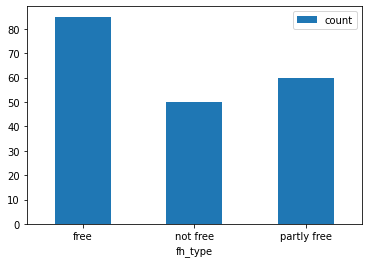

In [107]:
 %matplotlib inline
 ax = df_part.plot.bar(x='fh_type', y='count', rot=0)